# Box targets analisys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import normalize
from sklearn.model_selection import cross_val_predict

import warnings
warnings.filterwarnings('ignore')

from IPython.display import clear_output

%matplotlib inline

e:\programs\py\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df_train_X = pd.read_csv('../Data/train_data.csv')
df_train_Y = pd.read_csv('../Data/train_answers.csv')

In [3]:
df_test = pd.read_csv('../Data/test_data.csv')

In [4]:
df_train = df_train_X.merge(df_train_Y, on='itemId', how='inner')

## EDA

In [5]:
df_train.head()

,userId,itemId,Xmin,Ymin,Xmax,Ymax,Xmin_true,Ymin_true,Xmax_true,Ymax_true
0,1164,6132,62,656,276,803,47,650,213,812
1,1399,6132,184,662,235,740,47,650,213,812
2,1694,6132,63,648,272,830,47,650,213,812
3,916,6132,111,637,253,831,47,650,213,812
4,1621,6132,60,651,242,819,47,650,213,812


In [6]:
df_train['X_Y_ratio'] = (df_train['Xmax_true'] - df_train['Xmin_true'])/\
                            (df_train['Ymax_true'] - df_train['Ymin_true'])
    
df_train['X_Y_ratio'] = df_train['X_Y_ratio'].replace(np.inf, 2)
df_train.fillna(1, inplace=True)

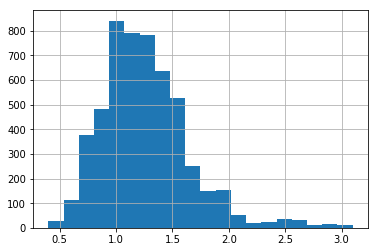

In [7]:
df_train['X_Y_ratio'].hist(bins=20)

In [8]:
df_train['X_Y_ratio'].mean()

1.2615958680650863

In [9]:
X_pred = df_train.groupby('itemId').agg({'Xmin': [min, 'mean'],
                                           'Ymin': [min, 'mean'],
                                           'Xmax': [max, 'mean'],
                                           'Ymax': [max, 'mean'],
                                           })

In [10]:
X_rez = X_pred.merge(df_train_Y, on='itemId', how='inner')

In [11]:
X_rez['Xmin_dtarg'] = X_rez['Xmin_true'] - X_rez[('Xmin', 'min')]
X_rez['Ymin_dtarg'] = X_rez['Ymin_true'] - X_rez[('Ymin', 'min')]
X_rez['Xmax_dtarg'] = X_rez['Xmax_true'] - X_rez[('Xmax', 'max')]
X_rez['Ymax_dtarg'] = X_rez['Ymax_true'] - X_rez[('Ymax', 'max')]

X_rez['Sum_error'] = abs(X_rez['Xmin_dtarg']) + abs(X_rez['Ymin_dtarg']) + abs(X_rez['Xmax_dtarg']) + abs(X_rez['Ymax_dtarg'])

In [12]:
X_rez.head()

,itemId,"(Xmin, min)","(Xmin, mean)","(Ymin, min)","(Ymin, mean)","(Xmax, max)","(Xmax, mean)","(Ymax, max)","(Ymax, mean)",Xmin_true,Ymin_true,Xmax_true,Ymax_true,Xmin_dtarg,Ymin_dtarg,Xmax_dtarg,Ymax_dtarg,Sum_error
0,5,151,184.333333,914,918.666667,511,501.333333,1331,1248.666667,198,827,649,1340,47,-87,138,9,281
1,10,72,87.666667,559,562.666667,427,416.333333,858,855.333333,26,605,433,847,-46,46,6,-11,109
2,13,46,69.666667,600,603.000000,621,596.666667,981,966.666667,233,698,622,920,187,98,1,-61,347
3,30,65,91.400000,353,365.600000,324,269.200000,491,459.200000,61,368,329,530,-4,15,5,39,63
4,32,9,28.166667,279,556.000000,388,256.166667,884,756.833333,30,536,328,813,21,257,-60,-71,409


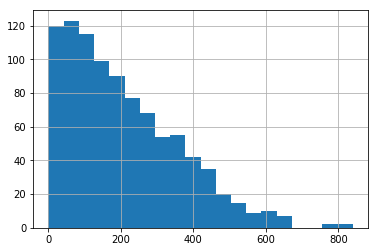

In [13]:
X_rez['Sum_error'].hist(bins=20)

In [14]:
X_largeErr = X_rez[X_rez['Sum_error'] > 500]
X_largeErr.sort_values(by='Sum_error', ascending=False)

,itemId,"(Xmin, min)","(Xmin, mean)","(Ymin, min)","(Ymin, mean)","(Xmax, max)","(Xmax, mean)","(Ymax, max)","(Ymax, mean)",Xmin_true,Ymin_true,Xmax_true,Ymax_true,Xmin_dtarg,Ymin_dtarg,Xmax_dtarg,Ymax_dtarg,Sum_error
372,15026,35,73.000000,749,771.666667,958,917.000000,1545,1413.333333,218,901,853,1145,183,152,-105,-400,840
448,17925,66,189.833333,569,610.500000,828,809.000000,1281,1202.000000,391,671,842,882,325,102,14,-399,840
545,21098,57,109.500000,544,629.500000,907,800.750000,1424,1370.000000,24,776,596,1208,-33,232,-311,-216,792
685,26565,39,198.166667,798,853.833333,995,833.000000,1482,1350.333333,256,956,671,1407,217,158,-324,-75,774
13,168,98,108.000000,472,490.333333,446,439.333333,1216,1191.000000,21,435,770,1001,-77,-37,324,-215,653
837,32159,102,126.500000,475,567.833333,858,725.666667,1304,1205.000000,101,624,597,1069,-1,149,-261,-235,646
72,2757,70,80.000000,780,812.000000,470,459.333333,1169,1157.000000,233,698,622,920,163,-82,152,-249,646
517,20303,79,174.777778,136,208.000000,689,643.777778,836,715.000000,234,251,745,517,155,115,56,-319,645
312,12564,22,39.600000,588,596.800000,915,834.000000,1249,1244.600000,42,734,648,1453,20,146,-267,204,637
265,10412,28,259.500000,568,599.000000,975,781.333333,1302,1055.166667,342,703,993,1136,314,135,18,-166,633


In [15]:
X_rez['X_length'] = X_rez[('Xmax', 'mean')] - X_rez[('Xmin', 'mean')]
X_rez['Y_length'] = X_rez[('Ymax', 'mean')] - X_rez[('Ymin', 'mean')]

X_rez['X_Y_ratio'] = X_rez['X_length']/X_rez['Y_length']
                            
    
X_rez['X_Y_ratio_true'] = (X_rez['Xmax_true'] - X_rez['Xmin_true'])/\
                        (X_rez['Ymax_true'] - X_rez['Ymin_true'])

In [16]:
cond1 = (abs(X_rez['X_Y_ratio_true'] - X_rez['X_Y_ratio']) > 0.8)
cond2 = (X_rez[('Xmax', 'mean')] < X_rez['Xmin_true']) | (X_rez[('Xmin', 'mean')] > X_rez['Xmax_true'])
cond3 = (X_rez[('Ymax', 'mean')] < X_rez['Ymin_true']) | (X_rez[('Ymin', 'mean')] > X_rez['Ymax_true'])

cond = ~(cond1 | cond2 | cond3)

In [17]:
X_rez['Ymax_true'].max()

1949

In [18]:
# import pickle
# with open('filtercond.pikle', 'wb') as F:
#     pickle.dump(cond, F)

### Ручная фильтрация

In [19]:
X_rez

,itemId,"(Xmin, min)","(Xmin, mean)","(Ymin, min)","(Ymin, mean)","(Xmax, max)","(Xmax, mean)","(Ymax, max)","(Ymax, mean)",Xmin_true,...,Ymax_true,Xmin_dtarg,Ymin_dtarg,Xmax_dtarg,Ymax_dtarg,Sum_error,X_length,Y_length,X_Y_ratio,X_Y_ratio_true
0,5,151,184.333333,914,918.666667,511,501.333333,1331,1248.666667,198,...,1340,47,-87,138,9,281,317.000000,330.000000,0.960606,0.879142
1,10,72,87.666667,559,562.666667,427,416.333333,858,855.333333,26,...,847,-46,46,6,-11,109,328.666667,292.666667,1.123007,1.681818
2,13,46,69.666667,600,603.000000,621,596.666667,981,966.666667,233,...,920,187,98,1,-61,347,527.000000,363.666667,1.449129,1.752252
3,30,65,91.400000,353,365.600000,324,269.200000,491,459.200000,61,...,530,-4,15,5,39,63,177.800000,93.600000,1.899573,1.654321
4,32,9,28.166667,279,556.000000,388,256.166667,884,756.833333,30,...,813,21,257,-60,-71,409,228.000000,200.833333,1.135270,1.075812
5,48,50,52.333333,1029,1030.333333,163,155.000000,1103,1101.000000,85,...,1113,35,2,1,10,48,102.666667,70.666667,1.452830,0.963415
6,64,22,26.000000,417,426.000000,244,217.333333,564,561.666667,21,...,565,-1,-1,-21,1,24,191.333333,135.666667,1.410319,1.355705
7,78,49,85.750000,194,204.750000,617,592.250000,707,692.750000,4,...,644,-45,-89,199,-63,396,506.500000,488.000000,1.037910,1.506494
8,90,35,78.333333,269,273.000000,474,427.000000,608,561.666667,103,...,542,68,103,-150,-66,387,348.666667,288.666667,1.207852,1.300000
9,118,47,87.666667,1269,1271.000000,188,180.666667,1372,1335.000000,46,...,1408,-1,8,-45,36,90,93.000000,64.000000,1.453125,0.740458


In [20]:
from matplotlib.patches import Rectangle

In [21]:
df_train.head()

,userId,itemId,Xmin,Ymin,Xmax,Ymax,Xmin_true,Ymin_true,Xmax_true,Ymax_true,X_Y_ratio
0,1164,6132,62,656,276,803,47,650,213,812,1.024691
1,1399,6132,184,662,235,740,47,650,213,812,1.024691
2,1694,6132,63,648,272,830,47,650,213,812,1.024691
3,916,6132,111,637,253,831,47,650,213,812,1.024691
4,1621,6132,60,651,242,819,47,650,213,812,1.024691


Картинка 900 из 943


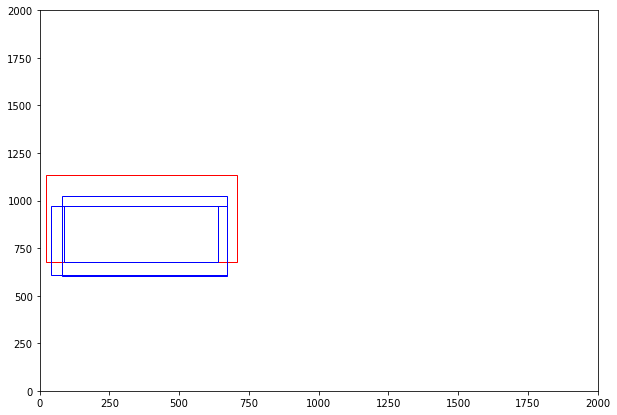

In [ ]:
filterlist = []
for ind, item in enumerate(df_train['itemId'].unique()):
    npictures = df_train['itemId'].nunique()
    print(f'Картинка {ind} из {npictures}')
    data = df_train[df_train['itemId'] == item]
    flag = True
    
    fig, ax = plt.subplots(figsize=(10, 7))
    plt.xlim(0, 2000)
    plt.ylim(0, 2000)
    for index, row in data.iterrows():
        if flag:
            ax.add_patch(Rectangle((row['Xmin_true'], row['Ymin_true']), 
                                   row['Xmax_true'] - row['Xmin_true'],
                                   row['Ymax_true'] - row['Ymin_true'], 
                                   linewidth=1,edgecolor='r',facecolor='none'))
            flag = False
        ax.add_patch(Rectangle((row['Xmin'], row['Ymin']), 
                                   row['Xmax'] - row['Xmin'],
                                   row['Ymax'] - row['Ymin'], 
                                   linewidth=1,edgecolor='b',facecolor='none'))
    plt.show()
    des = input('Введите символ для удаления семпла из трейна')
    if des: 
        filterlist.append(False) 
    else: 
        filterlist.append(True)
    clear_output()
    

In [25]:
print(filterlist)

[True, True, True, False, True, True, True, True, True, True]
